<a href="https://colab.research.google.com/github/PSLMssGerd44/Works-/blob/main/Cifrar_100_for_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tensorflow import keras 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
(train_image, train_label) , (test_image, test_label) = keras.datasets.cifar100.load_data()

169017344/169001437 [==============================] - 3s 0us/step


In [ ]:
test_image.shape

(10000, 32, 32, 3)

In [ ]:
train_image.shape

(50000, 32, 32, 3)

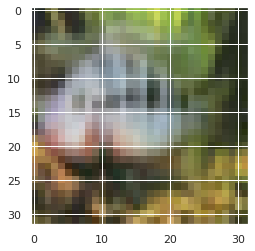

In [ ]:
plt.imshow(train_image[4])

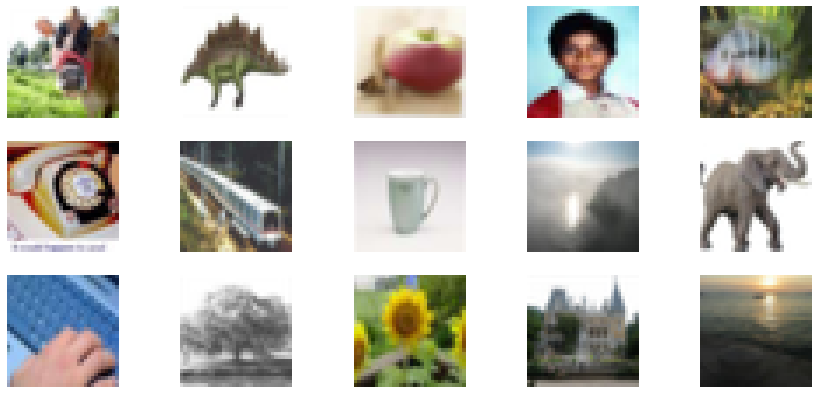

In [ ]:
fig , ax = plt.subplots(3,5, figsize=(15,7))
for i, ax in enumerate(ax.flat):                          #ejemplo de algunas
  ax.imshow(train_image[i], cmap='Greys')
  ax.axis('off')

In [ ]:
train_image = train_image / 255.0
test_image = test_image / 255.0                           #escala y "normaliza" los datos

In [ ]:
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
      keras.layers.Conv2D(32, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same',strides=(1,1) ,input_shape=(32, 32, 3)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(32, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same',strides=(1,1) ,input_shape=(32, 32, 3)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.3),

      keras.layers.Conv2D(64, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(64, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.3),

      keras.layers.Conv2D(128, kernel_size=3, activation='elu', kernel_initializer='he_normal' , padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.Conv2D(128, kernel_size=3, activation='elu', kernel_initializer='he_normal',  padding='same', strides=(1,1)),
      keras.layers.BatchNormalization(),
      keras.layers.MaxPool2D(pool_size=(2,2)),
      keras.layers.Dropout(0.4),

      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='elu', kernel_initializer='he_normal'),

      keras.layers.Dropout(0.5),

      keras.layers.Dense(100, activation='softmax')
])

^crea distintos modelos secuenciales, como convolucionales, y que antes del kernel size, se duplica el valor del optimizador, pues usa batch normalization y cada una, usa el anterior. También avanza en una escata o stride de 1,1. El dropout es mayor para la última para mostrar información que la red considera "más relevante" luego de la final en cada capa

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)     #early stop para no tenerlo tan pesado

In [ ]:
model.evaluate(test_image, test_label, verbose=0)     #figura de pérdida y figura de presición

[2.9318811893463135, 0.2750000059604645]

--2022-08-13 23:23:48--  https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168370 (164K) [image/jpeg]
Saving to: ‘indian_elephant.jpg’

indian_elephant.jpg 100%[===================>] 164.42K  --.-KB/s    in 0.08s   

2022-08-13 23:23:48 (2.10 MB/s) - ‘indian_elephant.jpg’ saved [168370/168370]

--2022-08-13 23:23:48--  https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/african_elephant_bull.jpg?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ssanchezgoe/diplomado_udea/raw/master/image/african_elephant_bull.jpg [following]
--2022-08-13 23:23:49--  https://

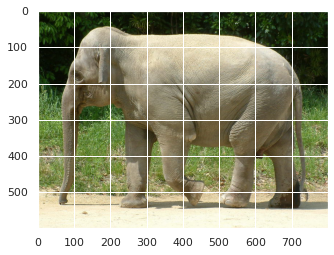

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


!wget https://upload.wikimedia.org/wikipedia/commons/f/f9/Zoorashia_elephant.jpg -O indian_elephant.jpg# elefante Hindú

!wget https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/african_elephant_bull.jpg?raw=true -O african_elephant.jpg# elefante africano

img_path = 'indian_elephant.jpg' # escoger para clasificar

img = mpimg.imread(img_path)
implot = plt.imshow(img)

print("Tamaño de la imagen:",img.shape)

VGNET: 2 o 3 capas convolucionales, una capa de agrupación, luego nuevamente 2 o 3 capas convolucionales, una capa de agrupación, etc. (con un total de solo 16 capas convolucionales), más una red densa al final con 2 capas ocultas y la capa de salida. Solo usó 3 × 3 filtros, pero muchos filtros. down()

In [ ]:
from keras.preprocessing import image

model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)    
model.summary()

553476096/553467096 [==============================] - 11s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

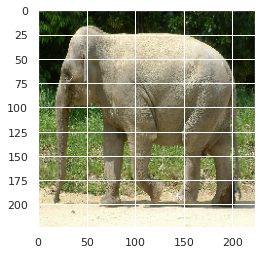

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
plt.imshow(img)

In [ ]:
x = np.expand_dims(x, axis=0)     #mdimensiones y datos de las capas convolucionales
x[0]

array([[[ 36.,  68.,   3.],
        [ 62.,  97.,  15.],
        [ 27.,  59.,   0.],
        ...,
        [ 25.,  60.,  20.],
        [ 26.,  57.,  13.],
        [ 57.,  78.,  21.]],

       [[ 49.,  84.,   4.],
        [ 74., 106.,  39.],
        [ 49.,  82.,  13.],
        ...,
        [ 21.,  53.,  16.],
        [ 47.,  82.,  42.],
        [ 34.,  67.,  24.]],

       [[ 49.,  81.,  16.],
        [ 50.,  78.,  37.],
        [ 55.,  87.,  24.],
        ...,
        [ 36.,  60.,  28.],
        [ 18.,  45.,  14.],
        [ 43.,  74.,  43.]],

       ...,

       [[249., 245., 220.],
        [255., 251., 226.],
        [255., 254., 229.],
        ...,
        [250., 250., 226.],
        [251., 251., 227.],
        [249., 249., 225.]],

       [[246., 242., 217.],
        [252., 248., 223.],
        [249., 245., 220.],
        ...,
        [252., 250., 227.],
        [252., 250., 227.],
        [249., 247., 224.]],

       [[251., 247., 222.],
        [248., 244., 219.],
        [241., 2

In [ ]:
x = keras.applications.vgg16.preprocess_input(x)

features = model.predict(x)

print("Prediction", keras.applications.vgg16.decode_predictions(features, top=3))

49152/35363 [=========================================] - 0s 0us/step
Prediction [[('n02504013', 'Indian_elephant', 0.7175735), ('n02504458', 'African_elephant', 0.24314483), ('n01871265', 'tusker', 0.03646176)]]


In [ ]:
!pip install keras_applications==1.0.4 --no-deps
!pip install keras_preprocessing==1.0.2 --no-deps
!pip install h5py==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: keras-preprocessing
    Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 5.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires h5py>=2.9.0, but you have h5py 2.8.0 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires keras-preprocessing>=1.1.1, but you have keras-preprocessing 1.0.2 which is incompatible.


In [ ]:
keras.backend.clear_session()

(down)RESNET:::tasa de error inferior a 3.6%, usando una CNN de 152 capas.usa skip connections o conexiones de atajo donde la señal que alimenta a una capa también se agrega a la salida de una capa ubicada un poco más arriba en la pila.


<p><img alt="Colaboratory logo" height="350px" src="https://github.com/ssanchezgoe/diplomado_udea/blob/master/image/resnet.png?raw=true" align="center" hspace="10px" vspace="0px"></p>

In [ ]:
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
import numpy as np

model = keras.applications.resnet50.ResNet50(weights='imagenet')
model.summary()

102981632/102967424 [==============================] - 4s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [ ]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = keras.applications.resnet50.preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', keras.applications.resnet50.decode_predictions(preds, top=3)[0])

Predicted: [('n02504013', 'Indian_elephant', 0.8198577), ('n02504458', 'African_elephant', 0.11778774), ('n01871265', 'tusker', 0.05829749)]


(down)transferencia de aprendizaje:::se usan los pesos entrenados de alguna red que realice una tarea similar a la objetivo para no se hacer de nuevo un entrenamiento partiendo de pesos inicializados de manera aleatoria, si no de pesos que ya han creado filtros adecuados para la tarea dada.

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.applications.vgg16 import VGG16       #vuelve a usar vgg16
model = VGG16()
model.summary()

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                        

In [ ]:
!wget 'https://pbs.twimg.com/profile_images/973248614469312512/ffd7wIOW_400x400.jpg'

--2022-08-13 23:27:29--  https://pbs.twimg.com/profile_images/973248614469312512/ffd7wIOW_400x400.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 192.229.173.16, 2606:2800:220:1410:489:141e:20bb:12f6
Connecting to pbs.twimg.com (pbs.twimg.com)|192.229.173.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18464 (18K) [image/jpeg]
Saving to: ‘ffd7wIOW_400x400.jpg’

ffd7wIOW_400x400.jp 100%[===================>]  18.03K  --.-KB/s    in 0s      

2022-08-13 23:27:29 (112 MB/s) - ‘ffd7wIOW_400x400.jpg’ saved [18464/18464]



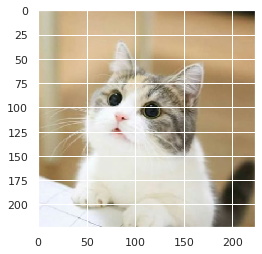

(224, 224, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

image = load_img('ffd7wIOW_400x400.jpg', target_size=(224, 224)) #VGG necesita imagenes de 224x224 pixeles
plt.imshow(image)
plt.show()
image = img_to_array(image)
image.shape

In [ ]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))#se procesa con el mismo preprocesamiento del entrenamiento
image = preprocess_input(image)

model = VGG16()
yhat = model.predict(image)
label = decode_predictions(yhat)#carga y predición de probabilidades
label = label[0][0]
label

('n02123045', 'tabby', 0.31831238)

In [ ]:
print('%s (%.2f%%)' % (label[1], label[2]*100))

tabby (31.83%)


In [ ]:
label   #dice que la imagen es de un gato, de raza atigrado (tabby) con una certeza de 31.8% (el resto de la probabilidad se reparte entre las otras 999 clases)

('n02123045', 'tabby', 0.31831238)

In [ ]:

from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten

model = VGG16(include_top=False, input_shape=(300, 300, 3)) #se carga el VGG sin las últimas capas (para que pueda entrenarse distinto)

flat1 = Flatten()(model.output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)#se agregan nuevas capas

model = Model(inputs=model.inputs, outputs=output)#se resuelve un modelo nuevo pero partiendo de lo anterior
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [ ]:
model = VGG16(include_top=False, input_shape=(300, 300, 3))
for layer in model.layers:
	layer.trainable = False#congela los pesos de las capas para que no entren en el modelo
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


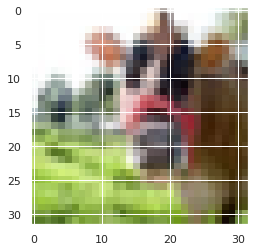

In [ ]:
from matplotlib import pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from keras.datasets import cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
plt.imshow(x_train[0])

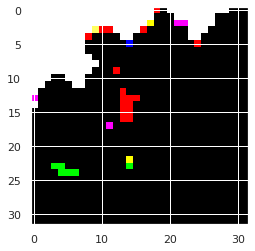

In [ ]:
x_train=preprocess_input(x_train)
x_test=preprocess_input(x_test)               #preprocesar con parámetros de VGG16
plt.imshow(x_train[0])

In [ ]:
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(32, 32, 3))#carga sin la parte densa
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:   #congelar excepto las últimas 4
    layer.trainable = False
for layer in conv_base.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f02720af1d0> False
<keras.layers.convolutional.Conv2D object at 0x7f0275c26d90> False
<keras.layers.convolutional.Conv2D object at 0x7f026f27e410> False
<keras.layers.pooling.MaxPooling2D object at 0x7f026f5d0710> False
<keras.layers.convolutional.Conv2D object at 0x7f026f5ee810> False
<keras.layers.convolutional.Conv2D object at 0x7f026f5eee50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f026f5d95d0> False
<keras.layers.convolutional.Conv2D object at 0x7f026f5ded10> False
<keras.layers.convolutional.Conv2D object at 0x7f026f5de950> False
<keras.layers.convolutional.Conv2D object at 0x7f026f6b0c10> False
<keras.layers.pooling.MaxPooling2D object at 0x7f026f6b4d90> False
<keras.layers.convolutional.Conv2D object at 0x7f026f6b4110> False
<keras.layers.convolutional.Conv2D object at 0x7f0275c2d3d0> False
<keras.layers.convolutional.Conv2D object at 0x7f026f6b1fd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f026f6b2390>

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())                                          #cargar ahora sí TODO el modelo
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='softmax'))

model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 512)               0

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)    #esto se demora muchisimo, ni intentar que cargue